In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

#when i have delete ECG feature
def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#no ECG feature one label
def x_data_y_data_create_5(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [17]:
#data_frame = read_csv_798()

data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

834
834
834


In [18]:
data_frame.columns

Index(['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.3', '1.0.4', 'yes',
       'no'],
      dtype='object')

In [6]:
data_frame = data_frame[['50.0', '1.0', '0.0', '1.0.1', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '1.0.2', '0.0.5', '0.0.6', '0.0.7', '0.0.8', '1.0.4']]

In [7]:
data_set = create_data_set(data_frame)

In [8]:
for i in data_set:
    print(i)

[60.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
[65.  2.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.]
[64.  2.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.]
[55.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[44.  1.  2.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.]
[67.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[60.  1.  2.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.]
[48.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[80.  1.  2.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[94.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.]
[43.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
[45.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.]
[75.  2.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.]
[63.  1.  2.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
[55.  1.  2.  

[63.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
[52.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.]
[40.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
[45.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[50.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[62.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[54.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[55.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[36.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[47.  1.  2.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[60.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
[65.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
[48.  2.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.]
[56.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[36.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.]
[61.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.]
[66.  2.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
[60.  1.  1.  

[48.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
[26.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.]
[48.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[27.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.]
[87.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.]
[48.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
[78.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.]
[90.  1.  2.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.]
[53.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
[62.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[47.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.]
[52.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
[30.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[35.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
[64.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]
[50.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.]
[40.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
[28.  1.  1.  

In [9]:
actual_x,actual_y = x_data_y_data_create_5(data_set)

In [10]:
len(data_set[0])

14

In [11]:
len(actual_x[0])

13

In [12]:
len(actual_y[0])

1

# 10 #losses.sparse_categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6754 - acc: 0.6000 - val_loss: 0.6855 - val_acc: 0.5238
Epoch 2/200
 - 0s - loss: 0.6650 - acc: 0.5960 - val_loss: 0.6915 - val_acc: 0.5833
Epoch 3/200
 - 0s - loss: 0.6670 - acc: 0.6040 - val_loss: 0.6788 - val_acc: 0.5952
Epoch 4/200
 - 0s - loss: 0.6719 - acc: 0.6000 - val_loss: 0.6949 - val_acc: 0.5833
Epoch 5/200
 - 0s - loss: 0.6666 - acc: 0.5973 - val_loss: 0.6919 - val_acc: 0.5833
Epoch 6/200
 - 0s - loss: 0.6641 - acc: 0.6053 - val_loss: 0.6722 - val_acc: 0.5833
Epoch 7/200
 - 0s - loss: 0.6597 - acc: 0.6080 - val_loss: 0.6740 - val_acc: 0.6429
Epoch 8/200
 - 0s - loss: 0.6554 - acc: 0.6107 - val_loss: 0.6849 - val_acc: 0.6071
Epoch 9/200
 - 0s - loss: 0.6642 - acc: 0.6160 - val_loss: 0.6761 - val_acc: 0.5833
Epoch 10/200
 - 0s - loss: 0.6725 - acc: 0.6040 - val_loss: 0.6747 - val_acc: 0.6190
Epoch 11/200
 - 0s - loss: 0.6600 - acc: 0.6107 - val_loss: 0.6734 - val_acc: 0.5833
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.6575 - acc: 0.6453 - val_loss: 0.6707 - val_acc: 0.5833
Epoch 98/200
 - 0s - loss: 0.6500 - acc: 0.6320 - val_loss: 0.6980 - val_acc: 0.6310
Epoch 99/200
 - 0s - loss: 0.6512 - acc: 0.6360 - val_loss: 0.7534 - val_acc: 0.5952
Epoch 100/200
 - 0s - loss: 0.6550 - acc: 0.6120 - val_loss: 0.6699 - val_acc: 0.6071
Epoch 101/200
 - 0s - loss: 0.6523 - acc: 0.6413 - val_loss: 0.6801 - val_acc: 0.6190
Epoch 102/200
 - 0s - loss: 0.6479 - acc: 0.6373 - val_loss: 0.6702 - val_acc: 0.5833
Epoch 103/200
 - 0s - loss: 0.6483 - acc: 0.6320 - val_loss: 0.6700 - val_acc: 0.5833
Epoch 104/200
 - 0s - loss: 0.6518 - acc: 0.6453 - val_loss: 0.6767 - val_acc: 0.6190
Epoch 105/200
 - 0s - loss: 0.6509 - acc: 0.6347 - val_loss: 0.6758 - val_acc: 0.6190
Epoch 106/200
 - 0s - loss: 0.6484 - acc: 0.6320 - val_loss: 0.6718 - val_acc: 0.6190
Epoch 107/200
 - 0s - loss: 0.6416 - acc: 0.6360 - val_loss: 0.7617 - val_acc: 0.5952
Epoch 108/200
 - 0s - loss: 0.6527 - acc: 0.6200 - val_lo

Epoch 193/200
 - 0s - loss: 0.6537 - acc: 0.6333 - val_loss: 0.6762 - val_acc: 0.6310
Epoch 194/200
 - 0s - loss: 0.6466 - acc: 0.6493 - val_loss: 0.7033 - val_acc: 0.6429
Epoch 195/200
 - 0s - loss: 0.6440 - acc: 0.6413 - val_loss: 0.6654 - val_acc: 0.6071
Epoch 196/200
 - 0s - loss: 0.6546 - acc: 0.6200 - val_loss: 0.7277 - val_acc: 0.6310
Epoch 197/200
 - 0s - loss: 0.6412 - acc: 0.6493 - val_loss: 0.6675 - val_acc: 0.6071
Epoch 198/200
 - 0s - loss: 0.6449 - acc: 0.6267 - val_loss: 0.6760 - val_acc: 0.6310
Epoch 199/200
 - 0s - loss: 0.6541 - acc: 0.6307 - val_loss: 0.6751 - val_acc: 0.6310
Epoch 200/200
 - 0s - loss: 0.6398 - acc: 0.6453 - val_loss: 0.7321 - val_acc: 0.6310


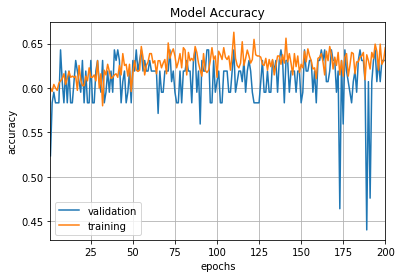

84/84 [==============================] - 0s 71us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.7321187995728993, 0.6309523752757481]
 best Score: 0.6309523752757481          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7502 - acc: 0.5840 - val_loss: 0.6749 - val_acc: 0.5833
Epoch 2/200
 - 0s - loss: 0.6668 - acc: 0.6107 - val_loss: 0.6766 - val_acc: 0.5833
Epoch 3/200
 - 0s - loss: 0.6651 - acc: 0.6053 - val_loss: 0.6800 - val_acc: 0.5833
Epoch 4/200
 - 0s - loss: 0.6653 - acc: 0.6000 - val_loss: 0.6767 - val_acc: 0.5833
Epoch 5/200
 - 0s - loss: 0.6619 - acc: 0.6053 - val_loss: 0.6788 - val_acc: 0.5833
Epoch 6/200
 - 0s - loss: 0.6607 - acc: 0.6053 - val_loss: 0.6778 - val_acc: 0.5952
Epoch 7/200
 - 0s - loss: 0.6682 - acc: 0.6080 - val_loss: 0.6741 - val_acc: 0.5833
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.6405 - acc: 0.6493 - val_loss: 0.6733 - val_acc: 0.5952
Epoch 94/200
 - 0s - loss: 0.6373 - acc: 0.6573 - val_loss: 0.6491 - val_acc: 0.6310
Epoch 95/200
 - 0s - loss: 0.6400 - acc: 0.6693 - val_loss: 0.6511 - val_acc: 0.6667
Epoch 96/200
 - 0s - loss: 0.6438 - acc: 0.6547 - val_loss: 0.6696 - val_acc: 0.6071
Epoch 97/200
 - 0s - loss: 0.6528 - acc: 0.6387 - val_loss: 0.6591 - val_acc: 0.6310
Epoch 98/200
 - 0s - loss: 0.6340 - acc: 0.6547 - val_loss: 0.6712 - val_acc: 0.5952
Epoch 99/200
 - 0s - loss: 0.6396 - acc: 0.6387 - val_loss: 0.6631 - val_acc: 0.6310
Epoch 100/200
 - 0s - loss: 0.6412 - acc: 0.6480 - val_loss: 0.6671 - val_acc: 0.6071
Epoch 101/200
 - 0s - loss: 0.6417 - acc: 0.6413 - val_loss: 0.6670 - val_acc: 0.5952
Epoch 102/200
 - 0s - loss: 0.6370 - acc: 0.6547 - val_loss: 0.6473 - val_acc: 0.6429
Epoch 103/200
 - 0s - loss: 0.6394 - acc: 0.6560 - val_loss: 0.6732 - val_acc: 0.5952
Epoch 104/200
 - 0s - loss: 0.6359 - acc: 0.6587 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6123 - acc: 0.6733 - val_loss: 0.6408 - val_acc: 0.7024
Epoch 190/200
 - 0s - loss: 0.6188 - acc: 0.6787 - val_loss: 0.6249 - val_acc: 0.6786
Epoch 191/200
 - 0s - loss: 0.6297 - acc: 0.6587 - val_loss: 0.6276 - val_acc: 0.6429
Epoch 192/200
 - 0s - loss: 0.6125 - acc: 0.6787 - val_loss: 0.6761 - val_acc: 0.6429
Epoch 193/200
 - 0s - loss: 0.6071 - acc: 0.6907 - val_loss: 0.6100 - val_acc: 0.7381
Epoch 194/200
 - 0s - loss: 0.6239 - acc: 0.6813 - val_loss: 0.6105 - val_acc: 0.7262
Epoch 195/200
 - 0s - loss: 0.6176 - acc: 0.6880 - val_loss: 0.6380 - val_acc: 0.7024
Epoch 196/200
 - 0s - loss: 0.6146 - acc: 0.6773 - val_loss: 0.6082 - val_acc: 0.7262
Epoch 197/200
 - 0s - loss: 0.6086 - acc: 0.6680 - val_loss: 0.6951 - val_acc: 0.6310
Epoch 198/200
 - 0s - loss: 0.6255 - acc: 0.6973 - val_loss: 0.6320 - val_acc: 0.7143
Epoch 199/200
 - 0s - loss: 0.6216 - acc: 0.6747 - val_loss: 0.6435 - val_acc: 0.6429
Epoch 200/200
 - 0s - loss: 0.6227 - acc: 0.6760 - val

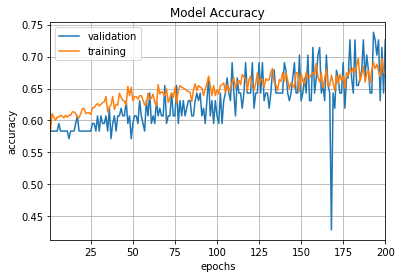

84/84 [==============================] - 0s 188us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6257255701791673, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.8410 - acc: 0.5613 - val_loss: 0.7135 - val_acc: 0.3810
Epoch 2/200
 - 0s - loss: 0.6880 - acc: 0.5667 - val_loss: 0.6727 - val_acc: 0.6429
Epoch 3/200
 - 0s - loss: 0.6797 - acc: 0.5760 - val_loss: 0.6667 - val_acc: 0.6429
Epoch 4/200
 - 0s - loss: 0.6745 - acc: 0.5893 - val_loss: 0.6545 - val_acc: 0.6310
Epoch 5/200
 - 0s - loss: 0.6609 - acc: 0.6040 - val_loss: 0.6381 - val_acc: 0.6310
Epoch 6/200
 - 0s - loss: 0.6672 - acc: 0.6013 - val_loss: 0.6299 - val_acc: 0.6310
Epoch 7/200
 - 0s - loss: 0.6646 - acc: 0.5960 - val_loss: 0.6404 - val_acc: 0.6310
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6292 - acc: 0.6680 - val_loss: 0.6409 - val_acc: 0.6786
Epoch 94/200
 - 0s - loss: 0.6374 - acc: 0.6467 - val_loss: 0.5923 - val_acc: 0.7381
Epoch 95/200
 - 0s - loss: 0.6270 - acc: 0.6587 - val_loss: 0.5886 - val_acc: 0.7262
Epoch 96/200
 - 0s - loss: 0.6332 - acc: 0.6520 - val_loss: 0.6486 - val_acc: 0.6905
Epoch 97/200
 - 0s - loss: 0.6247 - acc: 0.6640 - val_loss: 0.5940 - val_acc: 0.7381
Epoch 98/200
 - 0s - loss: 0.6255 - acc: 0.6467 - val_loss: 0.5877 - val_acc: 0.6548
Epoch 99/200
 - 0s - loss: 0.6208 - acc: 0.6693 - val_loss: 0.6002 - val_acc: 0.6190
Epoch 100/200
 - 0s - loss: 0.6407 - acc: 0.6560 - val_loss: 0.6061 - val_acc: 0.7262
Epoch 101/200
 - 0s - loss: 0.6312 - acc: 0.6560 - val_loss: 0.5875 - val_acc: 0.7381
Epoch 102/200
 - 0s - loss: 0.6334 - acc: 0.6627 - val_loss: 0.5883 - val_acc: 0.6548
Epoch 103/200
 - 0s - loss: 0.6318 - acc: 0.6493 - val_loss: 0.5834 - val_acc: 0.7024
Epoch 104/200
 - 0s - loss: 0.6290 - acc: 0.6547 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6255 - acc: 0.6800 - val_loss: 0.6719 - val_acc: 0.6071
Epoch 190/200
 - 0s - loss: 0.6289 - acc: 0.6587 - val_loss: 0.6024 - val_acc: 0.6667
Epoch 191/200
 - 0s - loss: 0.6242 - acc: 0.6827 - val_loss: 0.5847 - val_acc: 0.7381
Epoch 192/200
 - 0s - loss: 0.6199 - acc: 0.6800 - val_loss: 0.5852 - val_acc: 0.7381
Epoch 193/200
 - 0s - loss: 0.6155 - acc: 0.6853 - val_loss: 0.5700 - val_acc: 0.7381
Epoch 194/200
 - 0s - loss: 0.6243 - acc: 0.6707 - val_loss: 0.6226 - val_acc: 0.6905
Epoch 195/200
 - 0s - loss: 0.6117 - acc: 0.6813 - val_loss: 0.5884 - val_acc: 0.7262
Epoch 196/200
 - 0s - loss: 0.6250 - acc: 0.6787 - val_loss: 0.6002 - val_acc: 0.6905
Epoch 197/200
 - 0s - loss: 0.6302 - acc: 0.6680 - val_loss: 0.5738 - val_acc: 0.7619
Epoch 198/200
 - 0s - loss: 0.6095 - acc: 0.6867 - val_loss: 0.6245 - val_acc: 0.6905
Epoch 199/200
 - 0s - loss: 0.6165 - acc: 0.6733 - val_loss: 0.6804 - val_acc: 0.5952
Epoch 200/200
 - 0s - loss: 0.6073 - acc: 0.6920 - val

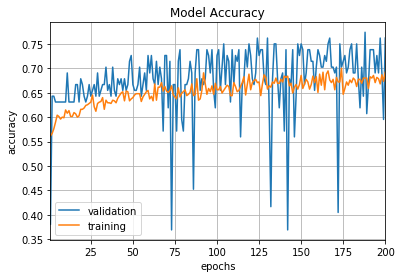

84/84 [==============================] - 0s 240us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5701846707434881, 0.7619047647430783]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.8786 - acc: 0.5693 - val_loss: 0.6995 - val_acc: 0.6071
Epoch 2/200
 - 0s - loss: 0.6986 - acc: 0.5760 - val_loss: 0.7148 - val_acc: 0.3929
Epoch 3/200
 - 0s - loss: 0.6981 - acc: 0.5440 - val_loss: 0.6872 - val_acc: 0.6071
Epoch 4/200
 - 0s - loss: 0.6794 - acc: 0.5840 - val_loss: 0.6632 - val_acc: 0.6071
Epoch 5/200
 - 0s - loss: 0.6783 - acc: 0.5920 - val_loss: 0.6674 - val_acc: 0.6071
Epoch 6/200
 - 0s - loss: 0.6756 - acc: 0.5907 - val_loss: 0.6687 - val_acc: 0.6071
Epoch 7/200
 - 0s - loss: 0.6698 - acc: 0.5933 - val_loss: 0.6573 - val_acc: 0.6071
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6457 - acc: 0.6440 - val_loss: 0.6268 - val_acc: 0.6667
Epoch 94/200
 - 0s - loss: 0.6422 - acc: 0.6533 - val_loss: 0.6440 - val_acc: 0.7143
Epoch 95/200
 - 0s - loss: 0.6469 - acc: 0.6427 - val_loss: 0.6604 - val_acc: 0.6190
Epoch 96/200
 - 0s - loss: 0.6452 - acc: 0.6307 - val_loss: 0.6374 - val_acc: 0.7500
Epoch 97/200
 - 0s - loss: 0.6382 - acc: 0.6547 - val_loss: 0.6346 - val_acc: 0.6310
Epoch 98/200
 - 0s - loss: 0.6386 - acc: 0.6440 - val_loss: 0.6275 - val_acc: 0.6667
Epoch 99/200
 - 0s - loss: 0.6408 - acc: 0.6480 - val_loss: 0.6410 - val_acc: 0.7262
Epoch 100/200
 - 0s - loss: 0.6423 - acc: 0.6493 - val_loss: 0.6322 - val_acc: 0.7500
Epoch 101/200
 - 0s - loss: 0.6339 - acc: 0.6573 - val_loss: 0.6790 - val_acc: 0.5357
Epoch 102/200
 - 0s - loss: 0.6374 - acc: 0.6347 - val_loss: 0.6352 - val_acc: 0.6310
Epoch 103/200
 - 0s - loss: 0.6369 - acc: 0.6467 - val_loss: 0.6244 - val_acc: 0.7143
Epoch 104/200
 - 0s - loss: 0.6459 - acc: 0.6387 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6291 - acc: 0.6613 - val_loss: 0.6095 - val_acc: 0.7381
Epoch 190/200
 - 0s - loss: 0.6164 - acc: 0.6827 - val_loss: 0.6085 - val_acc: 0.7381
Epoch 191/200
 - 0s - loss: 0.6116 - acc: 0.6653 - val_loss: 0.6040 - val_acc: 0.7500
Epoch 192/200
 - 0s - loss: 0.6139 - acc: 0.6560 - val_loss: 0.5987 - val_acc: 0.7381
Epoch 193/200
 - 0s - loss: 0.6205 - acc: 0.6520 - val_loss: 0.6030 - val_acc: 0.7619
Epoch 194/200
 - 0s - loss: 0.6313 - acc: 0.6547 - val_loss: 0.6031 - val_acc: 0.7738
Epoch 195/200
 - 0s - loss: 0.6230 - acc: 0.6680 - val_loss: 0.6195 - val_acc: 0.6786
Epoch 196/200
 - 0s - loss: 0.6203 - acc: 0.6787 - val_loss: 0.6162 - val_acc: 0.7262
Epoch 197/200
 - 0s - loss: 0.6203 - acc: 0.6720 - val_loss: 0.6485 - val_acc: 0.6190
Epoch 198/200
 - 0s - loss: 0.6168 - acc: 0.6787 - val_loss: 0.6103 - val_acc: 0.6905
Epoch 199/200
 - 0s - loss: 0.6223 - acc: 0.6773 - val_loss: 0.6079 - val_acc: 0.7143
Epoch 200/200
 - 0s - loss: 0.6119 - acc: 0.6840 - val

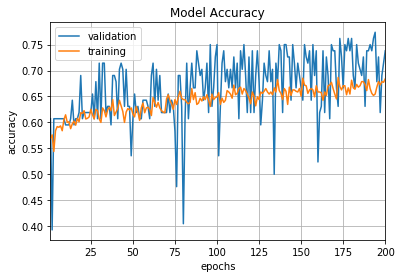

84/84 [==============================] - 0s 112us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6032582862036568, 0.7380952380952381]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 1.9619 - acc: 0.5579 - val_loss: 0.6734 - val_acc: 0.6747
Epoch 2/200
 - 0s - loss: 0.6814 - acc: 0.5939 - val_loss: 0.6640 - val_acc: 0.6747
Epoch 3/200
 - 0s - loss: 0.6787 - acc: 0.5939 - val_loss: 0.6561 - val_acc: 0.6747
Epoch 4/200
 - 0s - loss: 0.6768 - acc: 0.5939 - val_loss: 0.6511 - val_acc: 0.6747
Epoch 5/200
 - 0s - loss: 0.6761 - acc: 0.5939 - val_loss: 0.6485 - val_acc: 0.6747
Epoch 6/200
 - 0s - loss: 0.6759 - acc: 0.5939 - val_loss: 0.6467 - val_acc: 0.6747
Epoch 7/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6471 - val_acc: 0.6747
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6444 - val_acc: 0.6747
Epoch 94/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6453 - val_acc: 0.6747
Epoch 95/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6444 - val_acc: 0.6747
Epoch 96/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6453 - val_acc: 0.6747
Epoch 97/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6459 - val_acc: 0.6747
Epoch 98/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6464 - val_acc: 0.6747
Epoch 99/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6455 - val_acc: 0.6747
Epoch 100/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6446 - val_acc: 0.6747
Epoch 101/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6457 - val_acc: 0.6747
Epoch 102/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6445 - val_acc: 0.6747
Epoch 103/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6442 - val_acc: 0.6747
Epoch 104/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6454 - val_acc: 0.6747
Epoch 190/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6463 - val_acc: 0.6747
Epoch 191/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6452 - val_acc: 0.6747
Epoch 192/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6443 - val_acc: 0.6747
Epoch 193/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6439 - val_acc: 0.6747
Epoch 194/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6437 - val_acc: 0.6747
Epoch 195/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6435 - val_acc: 0.6747
Epoch 196/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6435 - val_acc: 0.6747
Epoch 197/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6429 - val_acc: 0.6747
Epoch 198/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val_loss: 0.6442 - val_acc: 0.6747
Epoch 199/200
 - 0s - loss: 0.6756 - acc: 0.5939 - val_loss: 0.6436 - val_acc: 0.6747
Epoch 200/200
 - 0s - loss: 0.6757 - acc: 0.5939 - val

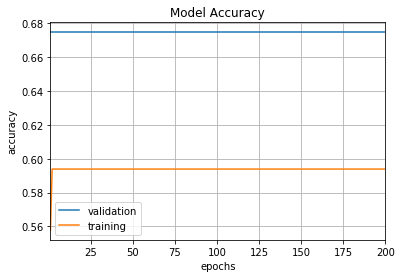

83/83 [==============================] - 0s 91us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.644647605447884, 0.6746987930263382]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.9562 - acc: 0.5766 - val_loss: 0.8317 - val_acc: 0.3855
Epoch 2/200
 - 0s - loss: 0.6806 - acc: 0.5739 - val_loss: 0.6855 - val_acc: 0.6145
Epoch 3/200
 - 0s - loss: 0.6694 - acc: 0.5925 - val_loss: 0.6708 - val_acc: 0.6145
Epoch 4/200
 - 0s - loss: 0.6642 - acc: 0.5979 - val_loss: 0.6582 - val_acc: 0.6145
Epoch 5/200
 - 0s - loss: 0.6671 - acc: 0.6005 - val_loss: 0.7047 - val_acc: 0.3855
Epoch 6/200
 - 0s - loss: 0.6649 - acc: 0.5992 - val_loss: 0.6602 - val_acc: 0.6145
Epoch 7/200
 - 0s - loss: 0.6629 - acc: 0.6099 - val_loss: 0.6920 - val_acc: 0.4699
Epoch 8/200

Epoch 93/200
 - 0s - loss: 0.6374 - acc: 0.6764 - val_loss: 0.7645 - val_acc: 0.3855
Epoch 94/200
 - 0s - loss: 0.6396 - acc: 0.6325 - val_loss: 0.6727 - val_acc: 0.6024
Epoch 95/200
 - 0s - loss: 0.6378 - acc: 0.6458 - val_loss: 0.6891 - val_acc: 0.6145
Epoch 96/200
 - 0s - loss: 0.6352 - acc: 0.6671 - val_loss: 0.6512 - val_acc: 0.6265
Epoch 97/200
 - 0s - loss: 0.6394 - acc: 0.6551 - val_loss: 0.6335 - val_acc: 0.6265
Epoch 98/200
 - 0s - loss: 0.6351 - acc: 0.6538 - val_loss: 0.6770 - val_acc: 0.6024
Epoch 99/200
 - 0s - loss: 0.6521 - acc: 0.6405 - val_loss: 0.6849 - val_acc: 0.5181
Epoch 100/200
 - 0s - loss: 0.6381 - acc: 0.6684 - val_loss: 0.6266 - val_acc: 0.6265
Epoch 101/200
 - 0s - loss: 0.6389 - acc: 0.6644 - val_loss: 0.6611 - val_acc: 0.6145
Epoch 102/200
 - 0s - loss: 0.6393 - acc: 0.6485 - val_loss: 0.7506 - val_acc: 0.3855
Epoch 103/200
 - 0s - loss: 0.6382 - acc: 0.6684 - val_loss: 0.8284 - val_acc: 0.3855
Epoch 104/200
 - 0s - loss: 0.6466 - acc: 0.6405 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6529 - acc: 0.6298 - val_loss: 0.6338 - val_acc: 0.6386
Epoch 190/200
 - 0s - loss: 0.6519 - acc: 0.6378 - val_loss: 0.6355 - val_acc: 0.6386
Epoch 191/200
 - 0s - loss: 0.6504 - acc: 0.6205 - val_loss: 0.6361 - val_acc: 0.6265
Epoch 192/200
 - 0s - loss: 0.6504 - acc: 0.6205 - val_loss: 0.7017 - val_acc: 0.4699
Epoch 193/200
 - 0s - loss: 0.6557 - acc: 0.6072 - val_loss: 0.6370 - val_acc: 0.6265
Epoch 194/200
 - 0s - loss: 0.6487 - acc: 0.6272 - val_loss: 0.6754 - val_acc: 0.6265
Epoch 195/200
 - 0s - loss: 0.6475 - acc: 0.6511 - val_loss: 0.6330 - val_acc: 0.6265
Epoch 196/200
 - 0s - loss: 0.6487 - acc: 0.6365 - val_loss: 0.6343 - val_acc: 0.6386
Epoch 197/200
 - 0s - loss: 0.6485 - acc: 0.6445 - val_loss: 0.6782 - val_acc: 0.6145
Epoch 198/200
 - 0s - loss: 0.6490 - acc: 0.6285 - val_loss: 0.6937 - val_acc: 0.4578
Epoch 199/200
 - 0s - loss: 0.6483 - acc: 0.6338 - val_loss: 0.6350 - val_acc: 0.6265
Epoch 200/200
 - 0s - loss: 0.6515 - acc: 0.6352 - val

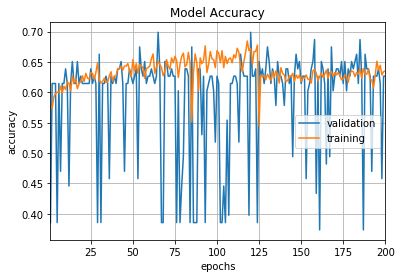

83/83 [==============================] - 0s 109us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6354933876589121, 0.6265060233782573]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7288 - acc: 0.5712 - val_loss: 0.6766 - val_acc: 0.6386
Epoch 2/200
 - 0s - loss: 0.6653 - acc: 0.6005 - val_loss: 0.7009 - val_acc: 0.3614
Epoch 3/200
 - 0s - loss: 0.6676 - acc: 0.5899 - val_loss: 0.6886 - val_acc: 0.5783
Epoch 4/200
 - 0s - loss: 0.6693 - acc: 0.6005 - val_loss: 0.6997 - val_acc: 0.3614
Epoch 5/200
 - 0s - loss: 0.6649 - acc: 0.5939 - val_loss: 0.6418 - val_acc: 0.6386
Epoch 6/200
 - 0s - loss: 0.6613 - acc: 0.5979 - val_loss: 0.6437 - val_acc: 0.6386
Epoch 7/200
 - 0s - loss: 0.6615 - acc: 0.6005 - val_loss: 0.6411 - val_acc: 0.6386
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6367 - acc: 0.6538 - val_loss: 0.7156 - val_acc: 0.6506
Epoch 94/200
 - 0s - loss: 0.6389 - acc: 0.6445 - val_loss: 0.6189 - val_acc: 0.6627
Epoch 95/200
 - 0s - loss: 0.6365 - acc: 0.6525 - val_loss: 0.6946 - val_acc: 0.5542
Epoch 96/200
 - 0s - loss: 0.6356 - acc: 0.6605 - val_loss: 0.7998 - val_acc: 0.3735
Epoch 97/200
 - 0s - loss: 0.6355 - acc: 0.6578 - val_loss: 0.6898 - val_acc: 0.5663
Epoch 98/200
 - 0s - loss: 0.6315 - acc: 0.6644 - val_loss: 0.6813 - val_acc: 0.6506
Epoch 99/200
 - 0s - loss: 0.6340 - acc: 0.6551 - val_loss: 0.6943 - val_acc: 0.5542
Epoch 100/200
 - 0s - loss: 0.6272 - acc: 0.6764 - val_loss: 0.6474 - val_acc: 0.6747
Epoch 101/200
 - 0s - loss: 0.6360 - acc: 0.6644 - val_loss: 0.6819 - val_acc: 0.6506
Epoch 102/200
 - 0s - loss: 0.6333 - acc: 0.6551 - val_loss: 0.7419 - val_acc: 0.6506
Epoch 103/200
 - 0s - loss: 0.6323 - acc: 0.6605 - val_loss: 0.7469 - val_acc: 0.4217
Epoch 104/200
 - 0s - loss: 0.6366 - acc: 0.6591 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6296 - acc: 0.6684 - val_loss: 0.6632 - val_acc: 0.6506
Epoch 190/200
 - 0s - loss: 0.6143 - acc: 0.6684 - val_loss: 0.7306 - val_acc: 0.6506
Epoch 191/200
 - 0s - loss: 0.6194 - acc: 0.6684 - val_loss: 0.7544 - val_acc: 0.4337
Epoch 192/200
 - 0s - loss: 0.6142 - acc: 0.6618 - val_loss: 0.6356 - val_acc: 0.6867
Epoch 193/200
 - 0s - loss: 0.6154 - acc: 0.6724 - val_loss: 0.7010 - val_acc: 0.6386
Epoch 194/200
 - 0s - loss: 0.6177 - acc: 0.6751 - val_loss: 0.6566 - val_acc: 0.6506
Epoch 195/200
 - 0s - loss: 0.6274 - acc: 0.6751 - val_loss: 0.6376 - val_acc: 0.6747
Epoch 196/200
 - 0s - loss: 0.6149 - acc: 0.6951 - val_loss: 0.7087 - val_acc: 0.6386
Epoch 197/200
 - 0s - loss: 0.6307 - acc: 0.6711 - val_loss: 0.6697 - val_acc: 0.6627
Epoch 198/200
 - 0s - loss: 0.6117 - acc: 0.6738 - val_loss: 0.6663 - val_acc: 0.6506
Epoch 199/200
 - 0s - loss: 0.6156 - acc: 0.6858 - val_loss: 0.8891 - val_acc: 0.3735
Epoch 200/200
 - 0s - loss: 0.6269 - acc: 0.6698 - val

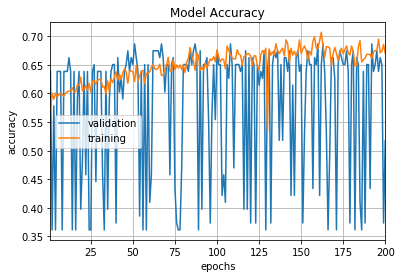

83/83 [==============================] - 0s 122us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.7327568581305355, 0.5180722916700754]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7267 - acc: 0.5752 - val_loss: 1.1703 - val_acc: 0.4699
Epoch 2/200
 - 0s - loss: 0.6818 - acc: 0.5979 - val_loss: 1.0962 - val_acc: 0.4699
Epoch 3/200
 - 0s - loss: 0.6947 - acc: 0.5752 - val_loss: 0.9323 - val_acc: 0.4699
Epoch 4/200
 - 0s - loss: 0.6784 - acc: 0.6138 - val_loss: 0.9121 - val_acc: 0.4699
Epoch 5/200
 - 0s - loss: 0.6631 - acc: 0.6232 - val_loss: 0.7596 - val_acc: 0.5301
Epoch 6/200
 - 0s - loss: 0.6693 - acc: 0.5992 - val_loss: 0.6923 - val_acc: 0.5301
Epoch 7/200
 - 0s - loss: 0.6601 - acc: 0.6125 - val_loss: 0.7055 - val_acc: 0.5301
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6496 - acc: 0.6272 - val_loss: 0.8306 - val_acc: 0.4699
Epoch 94/200
 - 0s - loss: 0.6557 - acc: 0.6325 - val_loss: 0.9024 - val_acc: 0.4699
Epoch 95/200
 - 0s - loss: 0.6492 - acc: 0.6431 - val_loss: 0.8255 - val_acc: 0.4699
Epoch 96/200
 - 0s - loss: 0.6544 - acc: 0.6285 - val_loss: 0.8602 - val_acc: 0.4699
Epoch 97/200
 - 0s - loss: 0.6516 - acc: 0.6391 - val_loss: 0.8344 - val_acc: 0.4699
Epoch 98/200
 - 0s - loss: 0.6503 - acc: 0.6245 - val_loss: 0.8130 - val_acc: 0.4699
Epoch 99/200
 - 0s - loss: 0.6520 - acc: 0.6298 - val_loss: 0.6720 - val_acc: 0.6024
Epoch 100/200
 - 0s - loss: 0.6528 - acc: 0.6272 - val_loss: 0.8544 - val_acc: 0.4699
Epoch 101/200
 - 0s - loss: 0.6482 - acc: 0.6298 - val_loss: 1.0296 - val_acc: 0.4699
Epoch 102/200
 - 0s - loss: 0.6596 - acc: 0.6378 - val_loss: 0.9200 - val_acc: 0.4699
Epoch 103/200
 - 0s - loss: 0.6517 - acc: 0.6365 - val_loss: 0.6729 - val_acc: 0.5301
Epoch 104/200
 - 0s - loss: 0.6571 - acc: 0.6338 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6563 - acc: 0.6218 - val_loss: 0.9954 - val_acc: 0.4699
Epoch 190/200
 - 0s - loss: 0.6507 - acc: 0.6391 - val_loss: 0.7057 - val_acc: 0.5181
Epoch 191/200
 - 0s - loss: 0.6601 - acc: 0.6431 - val_loss: 0.6829 - val_acc: 0.5301
Epoch 192/200
 - 0s - loss: 0.6590 - acc: 0.6258 - val_loss: 0.6771 - val_acc: 0.5663
Epoch 193/200
 - 0s - loss: 0.6494 - acc: 0.6178 - val_loss: 0.7495 - val_acc: 0.4699
Epoch 194/200
 - 0s - loss: 0.6491 - acc: 0.6232 - val_loss: 0.8249 - val_acc: 0.4699
Epoch 195/200
 - 0s - loss: 0.6562 - acc: 0.6178 - val_loss: 0.6719 - val_acc: 0.6265
Epoch 196/200
 - 0s - loss: 0.6503 - acc: 0.6352 - val_loss: 0.7745 - val_acc: 0.4699
Epoch 197/200
 - 0s - loss: 0.6561 - acc: 0.6378 - val_loss: 0.8258 - val_acc: 0.4699
Epoch 198/200
 - 0s - loss: 0.6573 - acc: 0.6391 - val_loss: 0.7518 - val_acc: 0.4699
Epoch 199/200
 - 0s - loss: 0.6560 - acc: 0.6445 - val_loss: 0.7470 - val_acc: 0.4699
Epoch 200/200
 - 0s - loss: 0.6639 - acc: 0.6059 - val

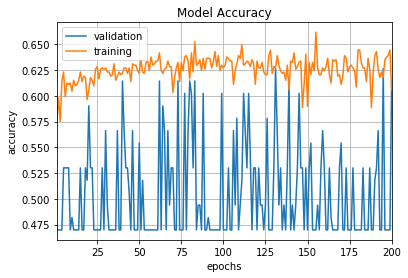

83/83 [==============================] - 0s 102us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6719805059662785, 0.6144578341978142]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7048 - acc: 0.5819 - val_loss: 0.6793 - val_acc: 0.5904
Epoch 2/200
 - 0s - loss: 0.6771 - acc: 0.6072 - val_loss: 0.7623 - val_acc: 0.3855
Epoch 3/200
 - 0s - loss: 0.6768 - acc: 0.5952 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 4/200
 - 0s - loss: 0.6729 - acc: 0.6032 - val_loss: 0.6767 - val_acc: 0.5904
Epoch 5/200
 - 0s - loss: 0.6722 - acc: 0.6032 - val_loss: 0.6768 - val_acc: 0.5904
Epoch 6/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 7/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6768 - val_acc: 0.5904
Epoch 8/2

Epoch 93/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 94/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 95/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 96/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 97/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 98/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 99/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 100/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 101/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 102/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 103/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 104/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6775 - val_acc: 0.5904
Epoch 190/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 191/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 192/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 193/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 194/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6773 - val_acc: 0.5904
Epoch 195/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6773 - val_acc: 0.5904
Epoch 196/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 197/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 198/200
 - 0s - loss: 0.6720 - acc: 0.6032 - val_loss: 0.6769 - val_acc: 0.5904
Epoch 199/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6770 - val_acc: 0.5904
Epoch 200/200
 - 0s - loss: 0.6719 - acc: 0.6032 - val

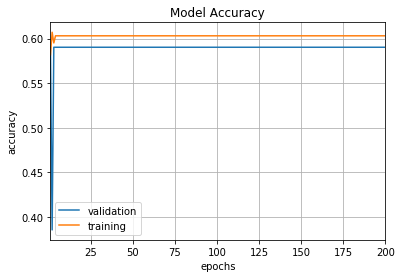

83/83 [==============================] - 0s 99us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6771333705948059, 0.590361450091902]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7851 - acc: 0.5859 - val_loss: 0.6561 - val_acc: 0.6265
Epoch 2/200
 - 0s - loss: 0.6625 - acc: 0.5992 - val_loss: 0.9386 - val_acc: 0.3735
Epoch 3/200
 - 0s - loss: 0.6645 - acc: 0.5965 - val_loss: 0.6533 - val_acc: 0.6265
Epoch 4/200
 - 0s - loss: 0.6622 - acc: 0.5992 - val_loss: 0.6740 - val_acc: 0.6265
Epoch 5/200
 - 0s - loss: 0.6573 - acc: 0.6072 - val_loss: 0.6578 - val_acc: 0.6265
Epoch 6/200
 - 0s - loss: 0.6611 - acc: 0.6005 - val_loss: 0.6510 - val_acc: 0.6265
Epoch 7/200
 - 0s - loss: 0.6587 - acc: 0.5992 - val_loss: 0.6592 - val_acc: 0.6265
Epoch 8/20

Epoch 93/200
 - 0s - loss: 0.6314 - acc: 0.6644 - val_loss: 0.6649 - val_acc: 0.6145
Epoch 94/200
 - 0s - loss: 0.6207 - acc: 0.6897 - val_loss: 0.6772 - val_acc: 0.6024
Epoch 95/200
 - 0s - loss: 0.6314 - acc: 0.6591 - val_loss: 0.6876 - val_acc: 0.6024
Epoch 96/200
 - 0s - loss: 0.6339 - acc: 0.6631 - val_loss: 0.6592 - val_acc: 0.6145
Epoch 97/200
 - 0s - loss: 0.6215 - acc: 0.6751 - val_loss: 0.8279 - val_acc: 0.6265
Epoch 98/200
 - 0s - loss: 0.6288 - acc: 0.6631 - val_loss: 0.6214 - val_acc: 0.6627
Epoch 99/200
 - 0s - loss: 0.6254 - acc: 0.6658 - val_loss: 0.6689 - val_acc: 0.6145
Epoch 100/200
 - 0s - loss: 0.6265 - acc: 0.6511 - val_loss: 0.7225 - val_acc: 0.6145
Epoch 101/200
 - 0s - loss: 0.6315 - acc: 0.6352 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 102/200
 - 0s - loss: 0.6279 - acc: 0.6565 - val_loss: 0.6970 - val_acc: 0.6145
Epoch 103/200
 - 0s - loss: 0.6251 - acc: 0.6751 - val_loss: 0.7488 - val_acc: 0.6145
Epoch 104/200
 - 0s - loss: 0.6363 - acc: 0.6605 - val_loss: 

Epoch 189/200
 - 0s - loss: 0.6173 - acc: 0.6764 - val_loss: 0.6700 - val_acc: 0.6386
Epoch 190/200
 - 0s - loss: 0.6080 - acc: 0.6804 - val_loss: 0.6756 - val_acc: 0.6265
Epoch 191/200
 - 0s - loss: 0.6167 - acc: 0.6937 - val_loss: 0.7607 - val_acc: 0.6145
Epoch 192/200
 - 0s - loss: 0.6236 - acc: 0.6631 - val_loss: 0.6309 - val_acc: 0.6506
Epoch 193/200
 - 0s - loss: 0.6090 - acc: 0.6844 - val_loss: 0.6568 - val_acc: 0.6386
Epoch 194/200
 - 0s - loss: 0.6069 - acc: 0.6911 - val_loss: 0.6976 - val_acc: 0.6386
Epoch 195/200
 - 0s - loss: 0.6129 - acc: 0.6844 - val_loss: 0.9301 - val_acc: 0.3735
Epoch 196/200
 - 0s - loss: 0.6150 - acc: 0.6818 - val_loss: 0.7823 - val_acc: 0.3735
Epoch 197/200
 - 0s - loss: 0.6206 - acc: 0.6698 - val_loss: 0.6283 - val_acc: 0.6386
Epoch 198/200
 - 0s - loss: 0.6149 - acc: 0.6977 - val_loss: 0.9453 - val_acc: 0.3735
Epoch 199/200
 - 0s - loss: 0.6291 - acc: 0.6711 - val_loss: 0.7288 - val_acc: 0.6145
Epoch 200/200
 - 0s - loss: 0.6131 - acc: 0.6858 - val

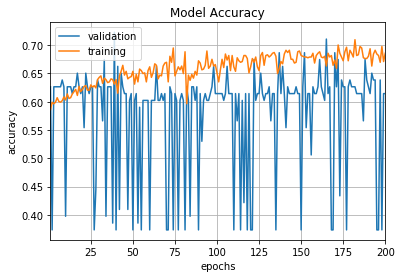

83/83 [==============================] - 0s 166us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.740766721317567, 0.6144578341978142]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------




In [13]:
batch_size = 10
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.sparse_categorical_crossentropy,
                  optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [14]:
print("accuracy")
best__acc_score = 0.0
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    if(i>best__acc_score):
        best__acc_score = i
    avg_accuracy_score += i

print(best__acc_score)
print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

accuracy
0.6920000012715658
0.6490941887403588


[0.6453333355983099,
 0.6760000055034955,
 0.6920000012715658,
 0.6840000025431315,
 0.5938748374442445,
 0.6351531318595978,
 0.6697736351928126,
 0.6058588606936637,
 0.6031957424274297,
 0.6857523348693365]

In [15]:
print("validation ")
print(best_score)

#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

validation 
0.7619047647430783
0.6495697083705059


[[0.7321187995728993, 0.6309523752757481],
 [0.6257255701791673, 0.7261904790287926],
 [0.5701846707434881, 0.7619047647430783],
 [0.6032582862036568, 0.7380952380952381],
 [0.644647605447884, 0.6746987930263382],
 [0.6354933876589121, 0.6265060233782573],
 [0.7327568581305355, 0.5180722916700754],
 [0.6719805059662785, 0.6144578341978142],
 [0.6771333705948059, 0.590361450091902],
 [0.740766721317567, 0.6144578341978142]]

In [16]:
kfold_validation_score_store

[[0.7321187995728993, 0.6309523752757481],
 [0.6257255701791673, 0.7261904790287926],
 [0.5701846707434881, 0.7619047647430783],
 [0.6032582862036568, 0.7380952380952381],
 [0.644647605447884, 0.6746987930263382],
 [0.6354933876589121, 0.6265060233782573],
 [0.7327568581305355, 0.5180722916700754],
 [0.6719805059662785, 0.6144578341978142],
 [0.6771333705948059, 0.590361450091902],
 [0.740766721317567, 0.6144578341978142]]